In [1]:
import cptac
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [3]:
cptac.download(dataset="Brca")
br = cptac.Brca()

protein_data = br.get_proteomics()

#The dataframes are MultIndex pandas dataframes. 
#However, to teach the basics of pandas, we will remove the "multi" part of the dataframe.
protein_data = protein_data.droplevel(1, axis=1)

rna_data = br.get_transcriptomics()
clinical_data = br.get_clinical()

In [4]:
clinical_data["Age_in_years"] = clinical_data["Age.in.Month"]/12 #fill in with correct math

In [15]:
#Step 2: Find the genes that are in the both protein_data and rna_data

#There are NA's in the protein_data and rna_data
#We will just drop any genes (columns) that have NA's
protein_data.dropna(inplace=True, axis=1 )
rna_data.dropna(inplace=True, axis=1 )

#Notice that the there are repeated genes in the protein data
#Does this make sense?
print( protein_data.shape[1] ) #number of columns (genes)
print( len(np.unique(protein_data.columns)) ) #number of UNIQUE columns (genes)

unique_genes = np.intersect1d( rna_data.columns, protein_data.columns )

#Fill in the []. Use : and unique_genes.

#Separate categories by age 
young_mask = clinical_data["Age_in_years"] <= 40.0
old_mask = clinical_data["Age_in_years"] >= 60.0


rna_young = rna_data[ young_mask ]
protein_young = protein_data[ young_mask ]
rna_old = rna_data[ old_mask ]
protein_old = protein_data[ old_mask ]


protein_data_young = protein_young.loc[:, unique_genes]
rna_data_young = rna_young.loc[:, genes_with_repeats]

protein_data_old = protein_old.loc[:, unique_genes]
rna_data_old = rna_old.loc[:, genes_with_repeats]


7767
7586


In [13]:
#Step 3: Calculate the Spearman correlations

#We need to calculate a spearman rho for each pair of genes (transcriptomics and proteomics)
#this calls for nested for loops!

#What are the dimensions of your final graph?
#Change later
genes_with_repeats_subset = protein_data[1:21]
n = 20 #fill in with the dimension of one axis. The graph is square.
final_graph = np.zeros( (n,n) )

for i, geneA in enumerate( genes_with_repeats_subset ):

    #we will fill in row by row
    graph_row = []
    for j, geneB in enumerate( genes_with_repeats_subset ):
        
        rho, spear_pvalue = stats.spearmanr( rna_data_genes.iloc[:,i], protein_data_genes.iloc[:,j])
        
        #append rho to graph_row here
        graph_row.append(rho)
    
    #set row i of final_graph equal to graph_row
    #remember [row, col] format, with : referring to all rows or all cols
    final_graph[i][:] = graph_row

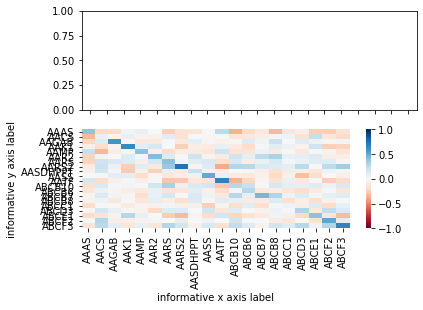

In [11]:
#Step 4: Create the Heatmap

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0] = sns.heatmap(final_graph, cmap='RdBu', xticklabels=genes_with_repeats_subset, \
                                                yticklabels=genes_with_repeats_subset, center=0, vmin=-1, vmax=1)
#ax[0].set_title("cool title")
ax[0].set_ylabel("informative y axis label")
ax[0].set_xlabel("informative x axis label")

ax[0] = sns.heatmap(final_graph, cmap='RdBu', xticklabels=genes_with_repeats_subset, \
                                                yticklabels=genes_with_repeats_subset, center=0, vmin=-1, vmax=1)
#ax[0].set_title("cool title")
ax[0].set_ylabel("informative y axis label")
ax[0].set_xlabel("informative x axis label")
plt.show() #Use in Jupyter, Comment out if running full script
#plt.savefig("PATH/FILE.png", bbox_inches="tight") #Use to save figure if running full script